# Atividade 02: Caracterização meteorológica da área de estudo

Nesta atividade caracterizaremos a meteorologia da (áreade estudo). Será explorada a Meteorologia de superfície, Meteorologia upperair ou sondagem/perfil da atmosfera, Superfície - Albedo, razão de Bowen e Rugosidade. 

Aluno: Guilherme Audi e Giovanna Martins

Professor: Leonardo Hoinaski

* A base de dados utilizada é provinite da estação meteorológica do aeroporto de florianópolis e foi retirada do site https://hoinaski.prof.ufsc.br/BRAIN/getMETAR.

 * Este trabalho contou com o uso do Chat GPT 4 para melhorias pontuais do scripts, bem como o material disponibilizado pelo professor Leonardo Hoinaski.

In [204]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064
C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\inputs
['metar.csv']


In [205]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN   50.0  2.572220   762.0  6.0  6.0   
1       1      1  2023     1 NaN   20.0  3.086664  1066.8  6.0  6.0   
2       1      1  2023     2 NaN  350.0  2.057776  1066.8  6.0  6.0   
3       1      1  2023     8 NaN  320.0  0.514444     NaN  NaN  NaN   
4       1      1  2023     9 NaN    0.0  0.000000   304.8  1.0  1.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
6890   31     12  2023    19 NaN   90.0  2.057776   762.0  6.0  6.0   
6891   31     12  2023    20 NaN  350.0  2.057776  1219.2  8.0  8.0   
6892   31     12  2023    21 NaN  350.0  3.086664  1219.2  6.0  6.0   
6893   31     12  2023    22 NaN  310.0  3.086664  1219.2  6.0  6.0   
6894   31     12  2023    23 NaN  270.0  1.028888   609.6  6.0  6.0   

                p  temp  dpTemp  vis   pw    relh  
0     1009.654835  26.0    22.0  NaN  0.0   78.62  
1     1009.654835  26.0    22.0  NaN  0.0  

In [206]:
# Criar uma coluna com Datetime dos dados
# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 08:00:00
4      2023-01-01 09:00:00
               ...        
6890   2023-12-31 19:00:00
6891   2023-12-31 20:00:00
6892   2023-12-31 21:00:00
6893   2023-12-31 22:00:00
6894   2023-12-31 23:00:00
Name: datetime, Length: 6895, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,50.0,2.572220,762.0,6.0,6.0,1009.654835,26.0,22.0,NaN,0.0,78.62,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,20.0,3.086664,1066.8,6.0,6.0,1009.654835,26.0,22.0,NaN,0.0,78.62,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,350.0,2.057776,1066.8,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 08:00:00,1,1,2023,8,NaN,320.0,0.514444,NaN,NaN,NaN,1009.658428,21.0,21.0,NaN,0.0,100.00,2023-01-01 08:00:00
2023-01-01 09:00:00,1,1,2023,9,NaN,0.0,0.000000,304.8,1.0,1.0,1009.654835,22.0,21.0,NaN,0.0,94.06,2023-01-01 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,90.0,2.057776,762.0,6.0,6.0,1009.651241,25.0,20.0,NaN,0.0,73.78,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,350.0,2.057776,1219.2,8.0,8.0,1009.651241,24.0,21.0,NaN,0.0,83.32,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,350.0,3.086664,1219.2,6.0,6.0,1009.654835,23.0,20.0,NaN,0.0,83.21,2023-12-31 21:00:00


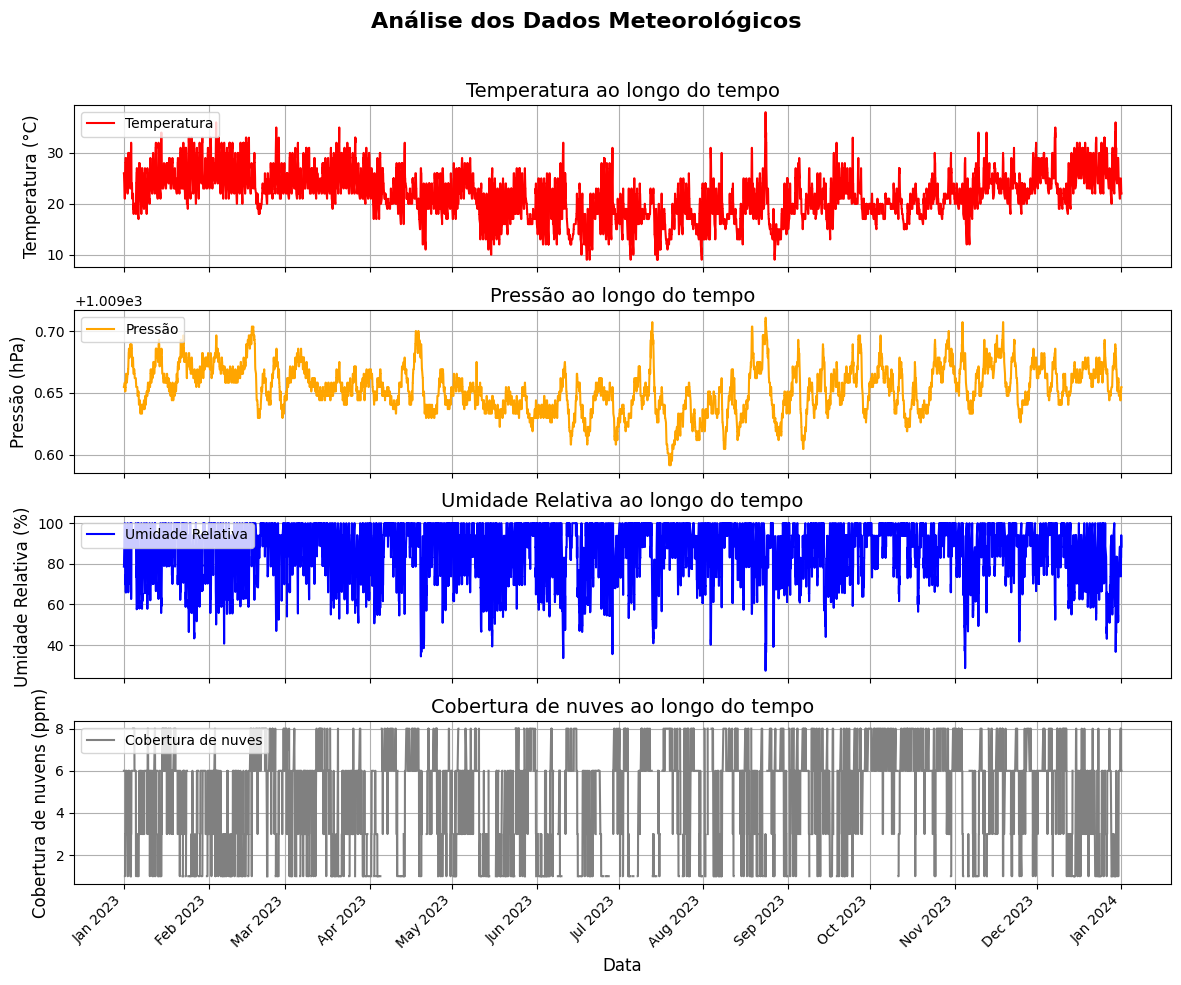

In [207]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configurações gerais do gráfico
fig, ax = plt.subplots(4, sharex=True, figsize=(12, 10))
fig.suptitle('Análise dos Dados Meteorológicos', fontsize=16, fontweight='bold')

# Temperatura
ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color='red', label='Temperatura')
ax[0].set_ylabel('Temperatura (°C)', fontsize=12)
ax[0].legend(loc='upper left')
ax[0].grid(True)
ax[0].set_title('Temperatura ao longo do tempo', fontsize=14)

# Pressão
ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color='orange', label='Pressão')
ax[1].set_ylabel('Pressão (hPa)', fontsize=12)
ax[1].legend(loc='upper left')
ax[1].grid(True)
ax[1].set_title('Pressão ao longo do tempo', fontsize=14)

# Umidade Relativa
ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'], color='blue', label='Umidade Relativa')
ax[2].set_ylabel('Umidade Relativa (%)', fontsize=12)
ax[2].legend(loc='upper left')
ax[2].grid(True)
ax[2].set_title('Umidade Relativa ao longo do tempo', fontsize=14)

# Cobertura de nuvens
ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color='gray', label='Cobertura de nuves')
ax[3].set_ylabel('Cobertura de nuvens (ppm)', fontsize=12)
ax[3].set_xlabel('Data', fontsize=12)
ax[3].legend(loc='upper left')
ax[3].grid(True)
ax[3].set_title('Cobertura de nuves ao longo do tempo', fontsize=14)

# Formatação do eixo x
ax[3].xaxis.set_major_locator(mdates.MonthLocator())
ax[3].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax[3].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Ajuste do layout
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


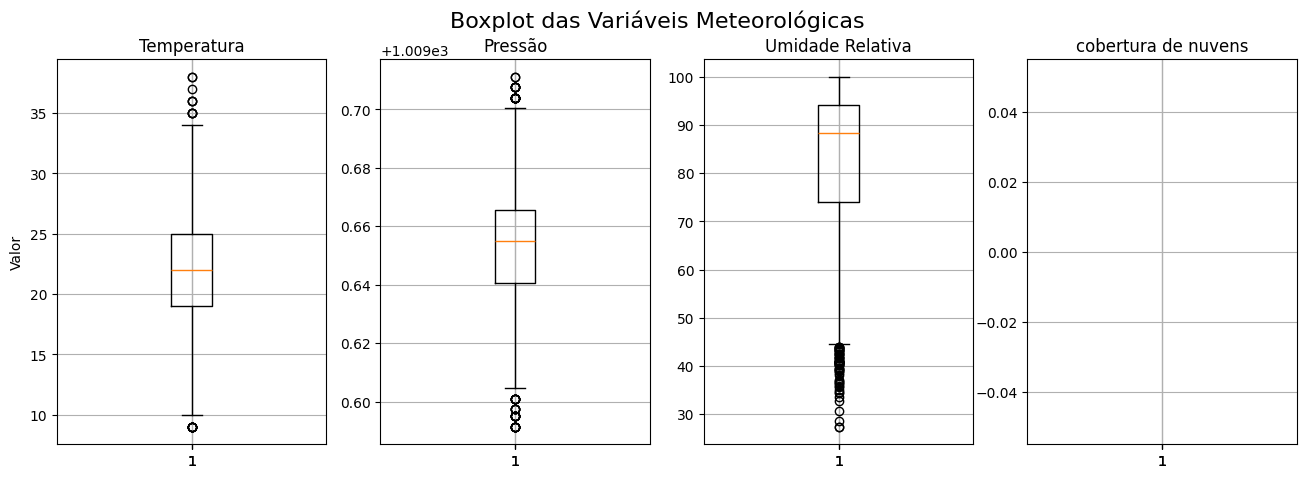

O percentil 99 da temperatura é: 32.0
O percentil 99 da pressão é: 1009.6967607391396
O percentil 99 da cco é: 8.0


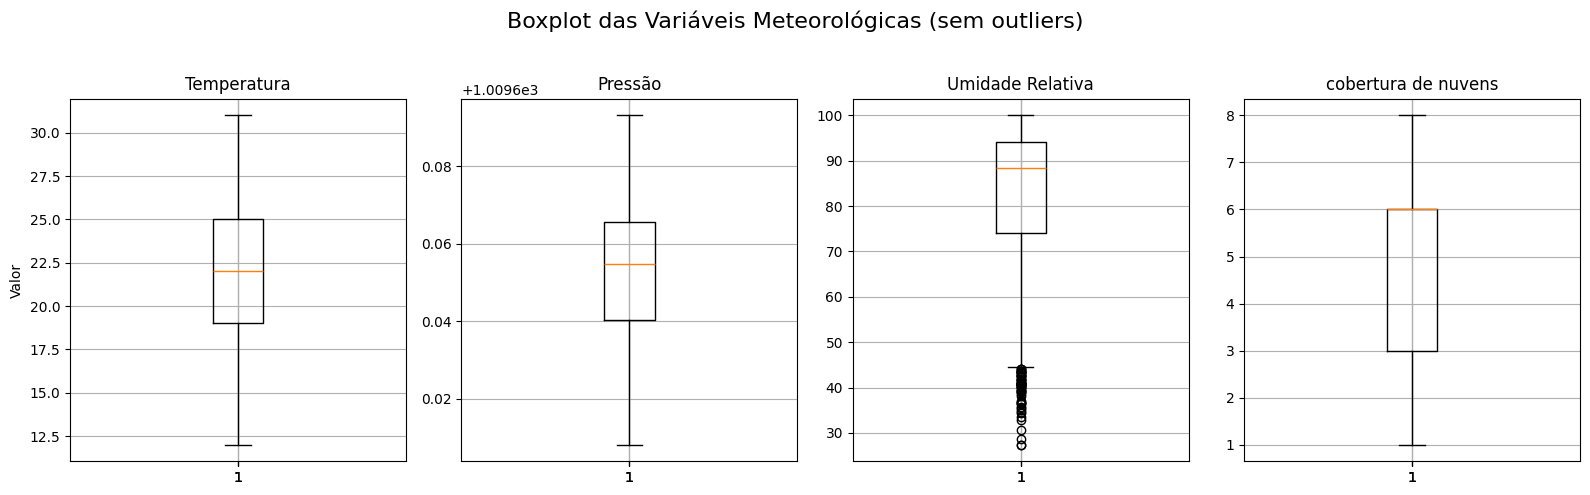

In [208]:
# PARA FINS DE MELHOR LEITURA DO GRÁFICO, FOI USADA INTELIGENCIA ARTIFICAL NESSA PARTE DO SCRIPT.
# Fazendo boxplot das variáveis
fig, ax = plt.subplots(1, 4, figsize=(16, 5), sharex=True)
fig.suptitle('Boxplot das Variáveis Meteorológicas', fontsize=16)
ax[0].boxplot(metSuperficie['temp'])
ax[0].set_title('Temperatura')
ax[0].set_ylabel('Valor')
ax[1].boxplot(metSuperficie['p'])
ax[1].set_title('Pressão')
ax[2].boxplot(metSuperficie['relh'])
ax[2].set_title('Umidade Relativa')
ax[3].boxplot(metSuperficie['cco'])
ax[3].set_title('cobertura de nuvens')

for a in ax:
    a.grid(True)
plt.show()

# Removendo valores acima do percentil 99
temp99 = np.percentile(metSuperficie['temp'], 99)
p99 = np.percentile(metSuperficie['p'], 99)
cco99 = np.nanpercentile(metSuperficie['cco'], 99)

print(f'O percentil 99 da temperatura é: {temp99}')
print(f'O percentil 99 da pressão é: {p99}')
print(f'O percentil 99 da cco é: {cco99}')

fig, ax = plt.subplots(1, 4, figsize=(16, 5), sharex=True)
fig.suptitle('Boxplot das Variáveis Meteorológicas (sem outliers)', fontsize=16)

ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp'] < temp99) & 
                                    (metSuperficie['temp'] > np.percentile(metSuperficie['temp'], 0.5))])
ax[0].set_title('Temperatura')
ax[0].set_ylabel('Valor')

ax[1].boxplot(metSuperficie['p'][(metSuperficie['p'] < p99) & 
                                  (metSuperficie['p'] > np.percentile(metSuperficie['p'], 0.5))])
ax[1].set_title('Pressão')
ax[2].boxplot(metSuperficie['relh'])
ax[2].set_title('Umidade Relativa')
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])
ax[3].set_title('cobertura de nuvens')
for a in ax:
    a.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN   50.0  2.572220   762.0  6.0  6.0   
1       1      1  2023     1 NaN   20.0  3.086664  1066.8  6.0  6.0   
2       1      1  2023     2 NaN  350.0  2.057776  1066.8  6.0  6.0   
3       1      1  2023     8 NaN  320.0  0.514444     NaN  NaN  NaN   
4       1      1  2023     9 NaN    0.0  0.000000   304.8  1.0  1.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
6890   31     12  2023    19 NaN   90.0  2.057776   762.0  6.0  6.0   
6891   31     12  2023    20 NaN  350.0  2.057776  1219.2  8.0  8.0   
6892   31     12  2023    21 NaN  350.0  3.086664  1219.2  6.0  6.0   
6893   31     12  2023    22 NaN  310.0  3.086664  1219.2  6.0  6.0   
6894   31     12  2023    23 NaN  270.0  1.028888   609.6  6.0  6.0   

                p  temp  dpTemp  vis   pw    relh            datetime  
0     1009.654835  26.0    22.0  NaN  0.0   78.62 2023-01-01 00:00:00  
1  

C:\Users\guilh\AppData\Local\Temp\ipykernel_9240\2990322112.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\guilh\AppData\Local\Temp\ipykernel_9240\2990322112.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()
C:\Users\guilh\AppData\Local\Temp\ipykernel_9240\2990322112.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  max_mensal = metSuperficie.resample('M').max()


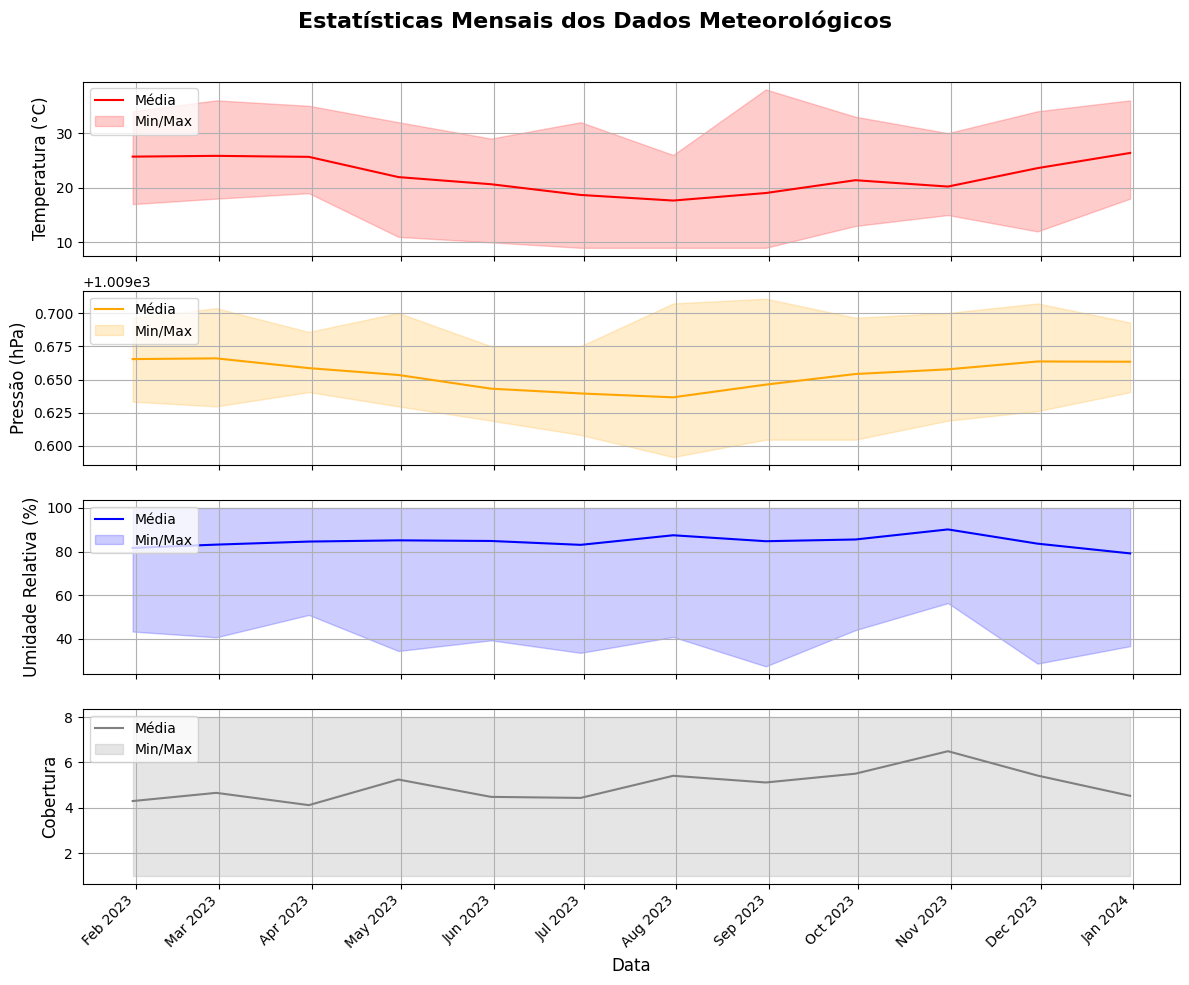

            day  month  year  hour  ct   wd   ws     hc  ccp  cco  \
datetime                                                            
2023-01-31    1      1  2023     0 NaN  0.0  0.0  60.96  1.0  1.0   
2023-02-28    1      2  2023     0 NaN  0.0  0.0  30.48  1.0  1.0   
2023-03-31    1      3  2023     0 NaN  0.0  0.0  30.48  1.0  1.0   
2023-04-30    1      4  2023     0 NaN  0.0  0.0  30.48  1.0  1.0   
2023-05-31    1      5  2023     0 NaN  0.0  0.0  30.48  1.0  1.0   
2023-06-30    1      6  2023     0 NaN  0.0  0.0  30.48  1.0  1.0   
2023-07-31    1      7  2023     0 NaN  0.0  0.0  30.48  1.0  1.0   
2023-08-31    1      8  2023     0 NaN  0.0  0.0   0.00  1.0  1.0   
2023-09-30    1      9  2023     0 NaN  0.0  0.0  60.96  1.0  1.0   
2023-10-31    1     10  2023     0 NaN  0.0  0.0  60.96  1.0  1.0   
2023-11-30    1     11  2023     0 NaN  0.0  0.0  60.96  1.0  1.0   
2023-12-31    1     12  2023     0 NaN  0.0  0.0  60.96  1.0  1.0   

                      p  temp  dp

In [209]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Estatísticas dos dados
print(metSuperficie)
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()
max_mensal = metSuperficie.resample('M').max()

# Configurações gerais do gráfico
fig, ax = plt.subplots(4, sharex=True, figsize=(12, 10))
fig.suptitle('Estatísticas Mensais dos Dados Meteorológicos', fontsize=16, fontweight='bold')

# Temperatura
ax[0].plot(media_mensal.index, media_mensal['temp'], color='red', label='Média')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='red', alpha=0.2, label='Min/Max')
ax[0].set_ylabel('Temperatura (°C)', fontsize=12)
ax[0].legend(loc='upper left')
ax[0].grid(True)

# Pressão
ax[1].plot(media_mensal.index, media_mensal['p'], color='orange', label='Média')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='orange', alpha=0.2, label='Min/Max')
ax[1].set_ylabel('Pressão (hPa)', fontsize=12)
ax[1].legend(loc='upper left')
ax[1].grid(True)

# Umidade Relativa
ax[2].plot(media_mensal.index, media_mensal['relh'], color='blue', label='Média')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='blue', alpha=0.2, label='Min/Max')
ax[2].set_ylabel('Umidade Relativa (%)', fontsize=12)
ax[2].legend(loc='upper left')
ax[2].grid(True)

# Cobertura de nuves
ax[3].plot(media_mensal.index, media_mensal['cco'], color='gray', label='Média')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='gray', alpha=0.2, label='Min/Max')
ax[3].set_ylabel('Cobertura', fontsize=12)
ax[3].set_xlabel('Data', fontsize=12)
ax[3].legend(loc='upper left')
ax[3].grid(True)

# Formatação do eixo x
ax[3].xaxis.set_major_locator(mdates.MonthLocator())
ax[3].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax[3].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Ajuste do layout
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(min_mensal)


C:\Users\guilh\AppData\Local\Temp\ipykernel_9240\2798816547.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = metSuperficie.resample('M').mean()


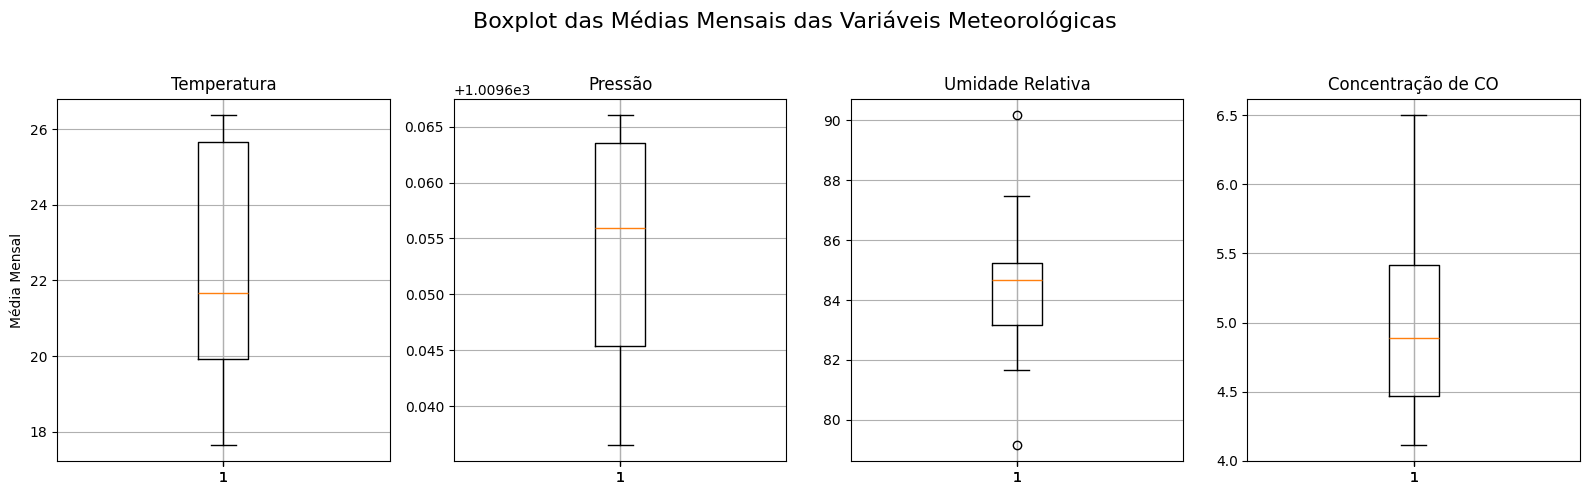

In [212]:
# Calculando as médias mensais
monthly_means = metSuperficie.resample('M').mean()

# Fazendo boxplot das médias mensais
fig, ax = plt.subplots(1, 4, figsize=(16, 5), sharex=True)
fig.suptitle('Boxplot das Médias Mensais das Variáveis Meteorológicas', fontsize=16)
ax[0].boxplot(monthly_means['temp'].dropna())
ax[0].set_title('Temperatura')
ax[0].set_ylabel('Média Mensal')
ax[1].boxplot(monthly_means['p'].dropna())
ax[1].set_title('Pressão')
ax[2].boxplot(monthly_means['relh'].dropna())
ax[2].set_title('Umidade Relativa')
ax[3].boxplot(monthly_means['cco'].dropna())
ax[3].set_title('Concentração de CO')
for a in ax:
    a.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

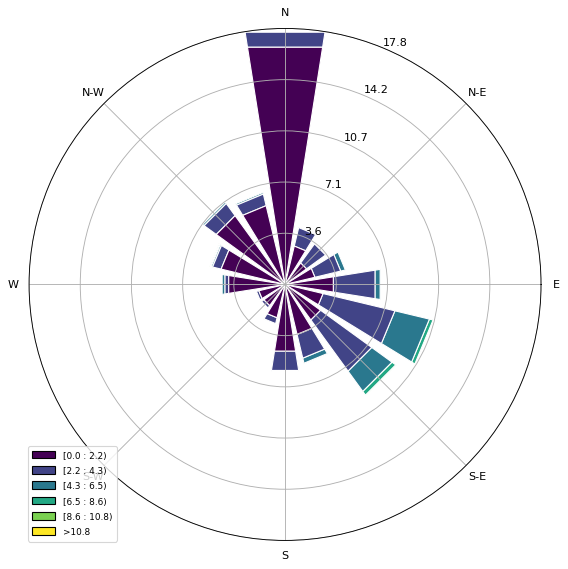

In [190]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()


Ao analisar a rosa dos ventos gerada, nota-se uma predomiancia na direção do vendo sentido norte. Desse modo, é plausível a hipótese de que os bairos localizados ao norte da fabrica da Tupy, em Joinville, podem ter impactos mais significativos pelos poluentes emitidos no processo. Exemplos de localidades enquadradas nessa análise, é o bairro desamente povoado "Jardim Iririú" localizao ao norte da fábrica. 

# Análise upperair/sondagem/perfil da atmosfera

In [191]:
from datetime import datetime

#from metpy.units import units

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

Dados de verão em 2023-01-01:
Altura da camada limite às 0h: 3705.0 m
Altura da camada limite às 12h: 1501 m
Dados de verão em 2023-01-02:
Altura da camada limite às 0h: 3206.0 m
Altura da camada limite às 12h: 1678 m
Dados de verão em 2023-01-03:
Altura da camada limite às 0h: 1471.0 m
Altura da camada limite às 12h: 876 m
Dados de verão em 2023-01-04:
Altura da camada limite às 0h: 1363 m
Altura da camada limite às 12h: 18923 m
Dados de verão em 2023-01-05:
Altura da camada limite às 0h: 3642 m
Altura da camada limite às 12h: 14902.0 m
Dados de inverno em 2023-07-01:


IndexError: index 20 is out of bounds for axis 0 with size 20

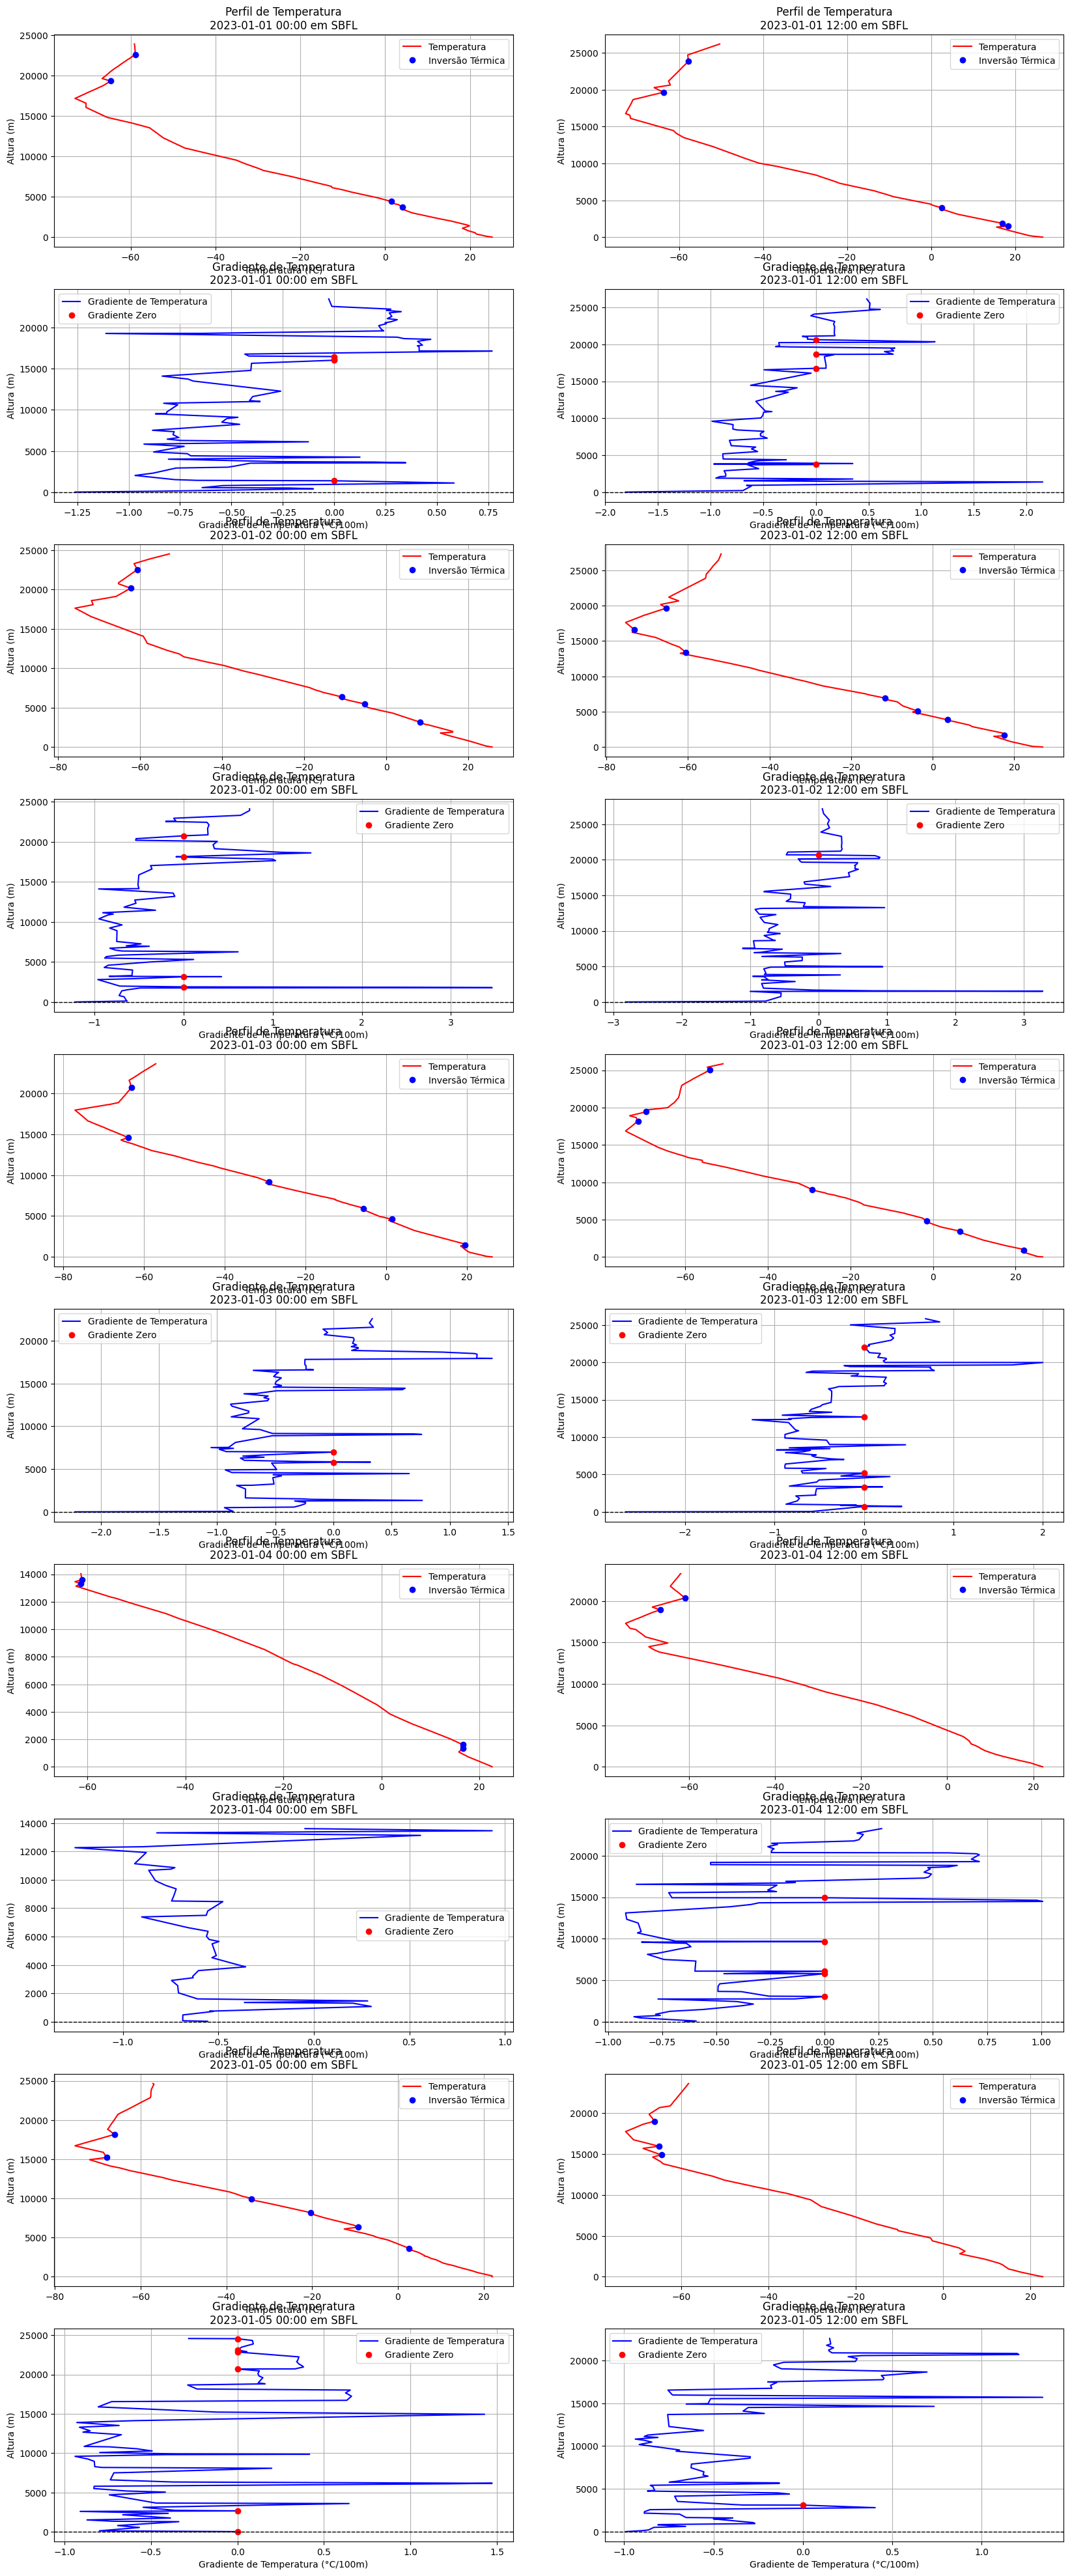

In [193]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Definindo a estação e a localização (Florianópolis)
station = 'SBFL'

# Função para calcular a altura da camada limite e identificar os pontos de inversão térmica
def calcular_altura_camada_limite(profile):
    inversao_termica_idx = []
    for i in range(1, len(profile['temperature']) - 1):
        if (profile['temperature'][i] > profile['temperature'][i - 1] and
            profile['temperature'][i] > profile['temperature'][i + 1]):
            inversao_termica_idx.append(i)
            
    # Calculando a altura da camada limite (baseada na primeira inversão térmica)
    if inversao_termica_idx:
        altura_camada_limite = profile['height'][inversao_termica_idx[0]]
    else:
        altura_camada_limite = None
    
    return altura_camada_limite, inversao_termica_idx

# Função para plotar o perfil de temperatura e marcar as inversões térmicas
def plotar_perfil(ax, profile, date, inversao_termica_idx):
    ax.plot(profile['temperature'], profile['height'], 'r', label='Temperatura')
    
    # Marcar pontos de inversão térmica
    if inversao_termica_idx:
        ax.plot(profile['temperature'][inversao_termica_idx], profile['height'][inversao_termica_idx], 'bo', label='Inversão Térmica')
    
    ax.set_xlabel('Temperatura (°C)')
    ax.set_ylabel('Altura (m)')
    ax.set_title(f'Perfil de Temperatura\n{date.strftime("%Y-%m-%d %H:%M")} em {station}')
    ax.legend()
    ax.grid(True)

# Função para calcular o gradiente de temperatura a cada 100 metros
def calcular_gradiente_temperatura(profile):
    deltaT = np.diff(profile['temperature'])
    deltaZ = np.diff(profile['height'])
    dTdZ = (deltaT / deltaZ) * 100  # Gradiente de temperatura a cada 100 m
    return dTdZ

# Função para plotar o gradiente de temperatura e marcar gradientes zero
def plotar_gradiente(ax, dTdZ, alturas, date):
    ax.plot(dTdZ, alturas[:-1], 'b', label='Gradiente de Temperatura')
    
    # Encontrar e marcar os pontos onde o gradiente é zero
    zero_grad_idx = np.where(dTdZ == 0)[0]
    ax.plot(dTdZ[zero_grad_idx], alturas[zero_grad_idx], 'ro', label='Gradiente Zero')
    
    # Adicionar uma linha horizontal no gradiente de temperatura
    ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
    
    ax.set_xlabel('Gradiente de Temperatura (°C/100m)')
    ax.set_ylabel('Altura (m)')
    ax.set_title(f'Gradiente de Temperatura\n{date.strftime("%Y-%m-%d %H:%M")} em {station}')
    ax.legend()
    ax.grid(True)

# Analisando dados de 0 e 12 horas durante 10 dias (5 no verão e 5 no inverno)

fig, axs = plt.subplots(10, 2, figsize=(20, 50))
axs = axs.flatten()

# Verão
for i in range(5):
    # Definindo datas para o verão
    date_verao = datetime(2023, 1, 1) + timedelta(days=i)

    # Coletando os dados de 0 horas
    profile_verao_0 = WyomingUpperAir.request_data(date_verao.replace(hour=0), station)

    # Coletando os dados de 12 horas
    profile_verao_12 = WyomingUpperAir.request_data(date_verao.replace(hour=12), station)

    # Plotando e analisando perfil de temperatura
    print(f"Dados de verão em {date_verao.strftime('%Y-%m-%d')}:")
    altura_camada_limite_verao_0, inversao_termica_idx_0 = calcular_altura_camada_limite(profile_verao_0)
    altura_camada_limite_verao_12, inversao_termica_idx_12 = calcular_altura_camada_limite(profile_verao_12)
    
    plotar_perfil(axs[i * 4], profile_verao_0, date_verao.replace(hour=0), inversao_termica_idx_0)
    plotar_perfil(axs[i * 4 + 1], profile_verao_12, date_verao.replace(hour=12), inversao_termica_idx_12)

    print(f"Altura da camada limite às 0h: {altura_camada_limite_verao_0} m")
    print(f"Altura da camada limite às 12h: {altura_camada_limite_verao_12} m")

    # Calculando e plotando gradiente de temperatura
    dTdZ_verao_0 = calcular_gradiente_temperatura(profile_verao_0)
    dTdZ_verao_12 = calcular_gradiente_temperatura(profile_verao_12)
    
    plotar_gradiente(axs[i * 4 + 2], dTdZ_verao_0, profile_verao_0['height'], date_verao.replace(hour=0))
    plotar_gradiente(axs[i * 4 + 3], dTdZ_verao_12, profile_verao_12['height'], date_verao.replace(hour=12))

# Inverno
for i in range(5):
    # Definindo datas para o inverno
    date_inverno = datetime(2023, 7, 1) + timedelta(days=i)

    # Coletando os dados de 0 horas
    profile_inverno_0 = WyomingUpperAir.request_data(date_inverno.replace(hour=0), station)

    # Coletando os dados de 12 horas
    profile_inverno_12 = WyomingUpperAir.request_data(date_inverno.replace(hour=12), station)

    # Plotando e analisando perfil de temperatura
    print(f"Dados de inverno em {date_inverno.strftime('%Y-%m-%d')}:")
    altura_camada_limite_inverno_0, inversao_termica_idx_0 = calcular_altura_camada_limite(profile_inverno_0)
    altura_camada_limite_inverno_12, inversao_termica_idx_12 = calcular_altura_camada_limite(profile_inverno_12)
    
    plotar_perfil(axs[(i + 5) * 4], profile_inverno_0, date_inverno.replace(hour=0), inversao_termica_idx_0)
    plotar_perfil(axs[(i + 5) * 4 + 1], profile_inverno_12, date_inverno.replace(hour=12), inversao_termica_idx_12)

    print(f"Altura da camada limite às 0h: {altura_camada_limite_inverno_0} m")
    print(f"Altura da camada limite às 12h: {altura_camada_limite_inverno_12} m")

    # Calculando e plotando gradiente de temperatura
    dTdZ_inverno_0 = calcular_gradiente_temperatura(profile_inverno_0)
    dTdZ_inverno_12 = calcular_gradiente_temperatura(profile_inverno_12)
    
    plotar_gradiente(axs[(i + 5) * 4 + 2], dTdZ_inverno_0, profile_inverno_0['height'], date_inverno.replace(hour=0))
    plotar_gradiente(axs[(i + 5) * 4 + 3], dTdZ_inverno_12, profile_inverno_12['height'], date_inverno.replace(hour=12))

plt.tight_layout()
plt.show()


['Best GFS Quarter Degree Forecast Time Series']
['time1', 'latitude', 'reftime1', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


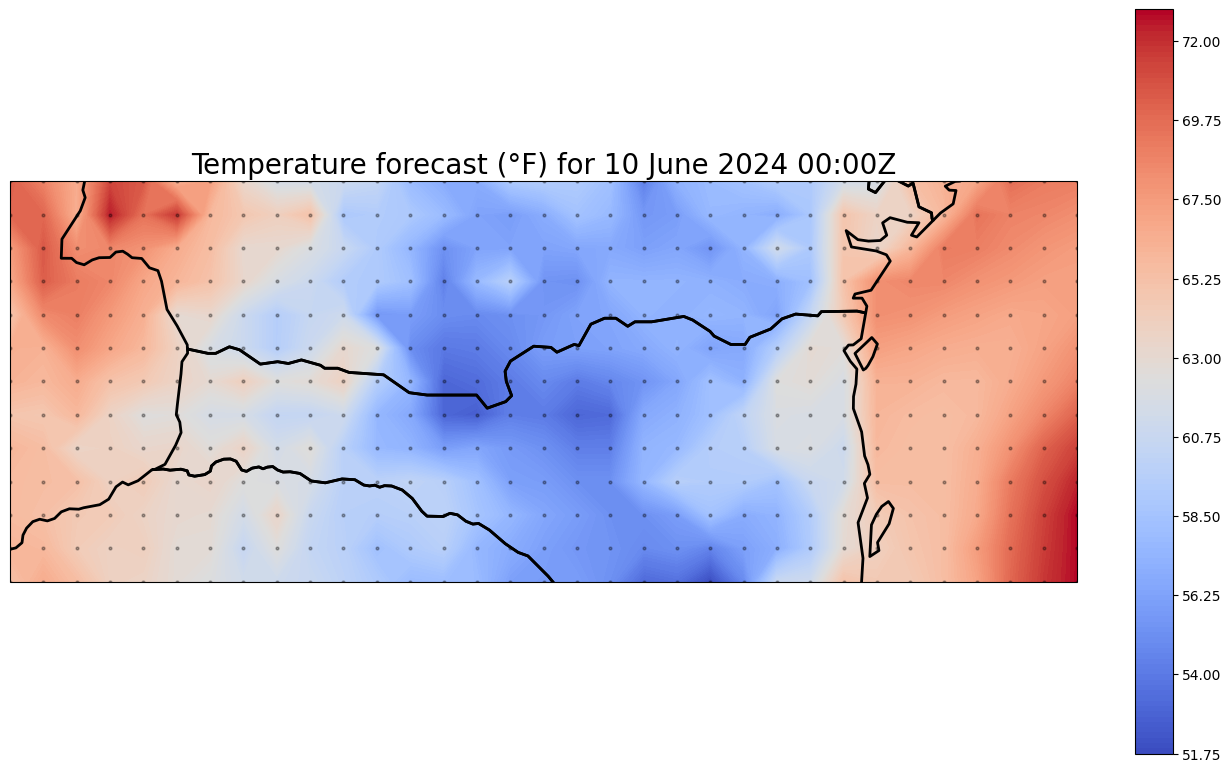

In [213]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()
#nao sei da onde ele tira essas coordenadas, mas o codigo está rodando, e o datetime ta pegando de agora (utcnow)
query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface'] # Podem analisar outras variáveis. 

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55., -47., -28, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')